# Imports

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
df = pd.read_csv("dataset/dataset_with_predicted_mean_A_mean_V.csv")

In [ ]:
df.head()

# Split dataset into inputs and targets

In [12]:
# drop target value, student annotations and string ID from input features:
X = df.drop(columns=['quadrant','mean_A','mean_V','id','score_mode','score_key_strength', 'predicted_quadrant'])

# we want to predict the quadrant:
y = df['quadrant'].values

In [13]:
X.head()

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,predicted_mean_A,predicted_mean_V
0,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,2.986095,...,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,45.216172,1.749838
1,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,4.181923,...,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252,42.078254,0.360194
2,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,4.303592,...,0.000314,0.201885,0.016944,-0.337422,0.103853,-0.388214,0.430684,-0.226197,48.451175,1.963364
3,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,5.271147,...,0.000257,0.181998,-0.019165,-0.314282,0.118872,-0.335902,0.314371,-0.006619,45.000775,1.033474
4,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,4.122828,...,0.000241,0.256362,-0.151648,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,31.551966,0.747443


# Quick Test Example using Default values

In [25]:
X_normalized = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

In [22]:

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.7969348659003831

# Find Optimum Params using GridSearchCV

In [28]:
max_k = 200
k_step = 3
k_range = list(range(1, 21, 1)) + list(range(22, 42, 2)) + list(range(43, 100, 3)) + list(range(100, 200, 5)) + list(range(200, 500, 10))

parameter_space = [{
    'selector__k': [5,10,20,"all"],
    'classifier__n_neighbors': np.array(k_range)
}]

pipeline = Pipeline([
        ("normalizer", MinMaxScaler()),
        ("selector", SelectKBest()),
        ('classifier', KNeighborsClassifier())
      ])

grid = GridSearchCV(pipeline, parameter_space, n_jobs=-1, cv=5, return_train_score=True, verbose=4)

grid.fit(X, y)


Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.3min


done with gridsearchCV. ### Best Estimator:  {'classifier__n_neighbors': 73, 'selector__k': 5}  ### Best Params:  {'classifier__n_neighbors': 73, 'selector__k': 5}


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:  3.1min finished


In [39]:

print("######### done with gridsearchCV \n######### Best Estimator: ")
print(grid.best_estimator_)
print("######### Best Params: \n", grid.best_params_)
print("######### Best Mean Test Score Achieved:\n", np.round(grid.best_score_,4))

######### done with gridsearchCV 
######### Best Estimator: 
Pipeline(memory=None,
         steps=[('normalizer', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector',
                 SelectKBest(k=5,
                             score_func=<function f_classif at 0x1297b9c20>)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=73, p=2,
                                      weights='uniform'))],
         verbose=False)
######### Best Params: 
 {'classifier__n_neighbors': 73, 'selector__k': 5}
######### Best Mean Test Score Achieved:
 0.7753


In [59]:
test_scores = grid.cv_results_["mean_test_score"]
train_scores = grid.cv_results_["mean_train_score"]

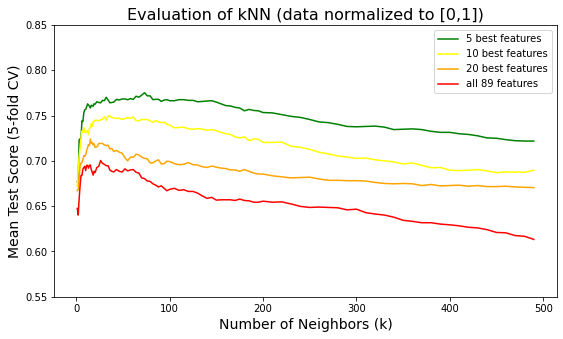

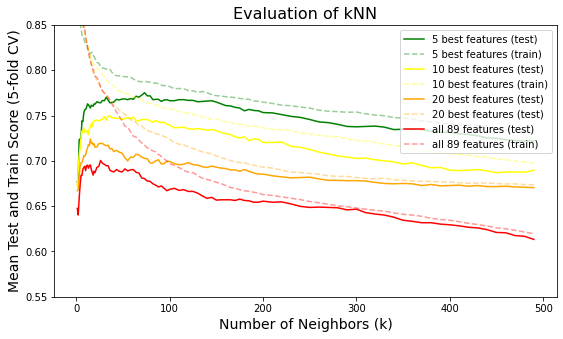

In [86]:
plt.figure(figsize=(9,5))
plt.ylim(0.55,.85)
plt.plot(k_range, test_scores[0::4], label="5 best features", color="green")
plt.plot(k_range, test_scores[1::4], label="10 best features", color="yellow")
plt.plot(k_range, test_scores[2::4], label="20 best features", color="orange")
plt.plot(k_range, test_scores[3::4], label="all 89 features", color="red")

plt.title("Evaluation of kNN (data normalized to [0,1])", fontsize=16)
plt.ylabel("Mean Test Score (5-fold CV)", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
plt.ylim(0.55,.85)
plt.plot(k_range, test_scores[0::4], label="5 best features (test)", color="green")
plt.plot(k_range, train_scores[0::4], label="5 best features (train)", color="green", linestyle='--', alpha=0.4)
plt.plot(k_range, test_scores[1::4], label="10 best features (test)", color="yellow")
plt.plot(k_range, train_scores[1::4], label="10 best features (train)", color="yellow", linestyle='--', alpha=0.4)
plt.plot(k_range, test_scores[2::4], label="20 best features (test)", color="orange")
plt.plot(k_range, train_scores[2::4], label="20 best features (test)", color="orange", linestyle='--', alpha=0.4)
plt.plot(k_range, test_scores[3::4], label="all 89 features (test)", color="red")
plt.plot(k_range, train_scores[3::4], label="all 89 features (train)", color="red", linestyle='--', alpha=0.4)

plt.title("Evaluation of kNN", fontsize=16)
plt.ylabel("Mean Test and Train Score (5-fold CV)", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=14)
plt.legend()
plt.show()

# Timing

In [ ]:
import time

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1337, stratify=y)

clf_time = KNeighborsClassifier(n_neighbors = 12)

train_times = []
predict_times = []

for i in range(100):

    start_time = time.time()
    clf_time.fit(X_train, y_train)
    train_times.append(time.time() - start_time)

    start_time = time.time()
    clf_time.predict(X_test)
    predict_times.append( (time.time() - start_time) )

print("Training Time:   \t", np.mean(train_times) * 1000, "ms" )
print("Prediction Time: \t", np.mean(predict_times) / len(y_test) * 1000, "ms")